In [184]:
#import the module
import json
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#retrieve theMovieDB.org API key
def get_keys(fname):
    '''
    Init signature: get_keys(filename)
    Docstring:     
    get_keys(filename='') -> dict
    Retrieve API key stored on file.  return a dictionary.
    
    Parameters
    ----------
    filename: Loation of the json file where the API key is stored.
      
    '''
    with open(fname) as f:
        return json.load(f)


In [2]:
# import the api key for movieDB using the get_keys function
keys = get_keys('moviedb.json')

#assign API value to variabloe
api_key = keys['api_key']


In [46]:
# Use mtdb API to retrieve list of movies with primary_release_date greater than 01-01-2010
def get_mtdb_movies():
    '''
    init signature:
        get_mtdb_movies() 
    docstring:
        get_mtdb_movies() -> dataframe
        Using TMDB API to retrive a list of movies
    '''
    # Define get request parameters
    url = 'https://api.themoviedb.org/3/discover/movie?'
    langauge = 'en-US'
    sort_by = 'popularity.desc'
    include_adult = 'false'
    include_video = 'false'
    primary_release_date_gt = '2010-01-01'

    url_param = {
                    'api_key': api_key,
                    'language': langauge,
                    'sort_by': sort_by,
                    'include_adult': include_adult,
                    'include_video': include_video,
                    'primary_release_date.gt': primary_release_date_gt
                }

# API only return 1 page with 20 results.  Set the loop to 500 times since the max number
# of pages allowed by TMDB is 500.
    for i in range(1,500): 
        # update the page number using the iteration value and pass it to the request parameter
        url_param.update({'page': i})
#         print('page', i)
        # create the response ojb.
        resp = requests.get(url, params=url_param)
        # if request status is sucessful and the value of key ['page'] is 1
        if resp.status_code == 200 and resp.json()['page'] == 1:
            # create the DataFrame
            df = pd.DataFrame.from_dict(resp.json()['results'])
        # if request status is sucessful and able to read the value of key ['page']
        elif resp.status_code == 200 and resp.json().get('page', 10000) < 10000:
            # convert response to dataframe
            a = pd.DataFrame.from_dict(resp.json()['results'])
            # concat the present df with the previous pass
            df = pd.concat([df, a], sort=False)
        # if request status is sucessful but unable to read the value of key ['page'],
        # assign value 10,000 and quit the loop  
        elif resp.status_code == 200 and resp.json().get('page', 10000) == 10000:
            break
    
    return df


In [ ]:
# Retrieve movie list from TMDB via their API
df = get_mtdb_movies()


In [47]:
# Check df
df.head()

,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,1305.559,591,False,/uPGq1mkEXznUpapDmOSxbsybjfp.jpg,475303,False,/6fkqwqLEcDZOEAnBBfKAniwNxtx.jpg,en,A Rainy Day in New York,"[35, 10749]",A Rainy Day in New York,6.7,Two young people arrive in New York to spend a...,2019-07-26
1,271.489,2483,False,/xBHvZcjRiWyobQ9kxBhO6B2dtRI.jpg,419704,False,/5BwqwxMEjeFtdknRV792Svo0K1v.jpg,en,Ad Astra,"[12, 18, 9648, 878, 53]",Ad Astra,6.0,"The near future, a time when both hope and har...",2019-09-17
2,217.757,546,False,/aQvJ5WPzZgYVDrxLX4R6cLJCEaQ.jpg,454626,False,/qonBhlm0UjuKX2sH7e73pnG0454.jpg,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",Sonic the Hedgehog,7.1,Based on the global blockbuster videogame fran...,2020-02-12
3,272.710,1901,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",Jumanji: The Next Level,6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
4,215.930,174,False,/4U7hpTK0XTQBKT5X60bKmJd05ha.jpg,570670,False,/uZMZyvarQuXLRqf3xdpdMqzdtjb.jpg,en,The Invisible Man,"[27, 9648, 878, 53]",The Invisible Man,7.5,When Cecilia's abusive ex takes his own life a...,2020-02-26


In [49]:
# Check the dimension of the df
df.shape

(9980, 14)

In [48]:
# Export initial df to csv since it is a lenghty process
df.to_csv('raw_tmdb.csv')

In [53]:
# Reset df index.  This will remove the duplicate index cause by concatenating the df's
df2 = df.reset_index()

In [56]:
# Check df2
df2.head()

,index,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,0,1305.559,591,False,/uPGq1mkEXznUpapDmOSxbsybjfp.jpg,475303,False,/6fkqwqLEcDZOEAnBBfKAniwNxtx.jpg,en,A Rainy Day in New York,"[35, 10749]",A Rainy Day in New York,6.7,Two young people arrive in New York to spend a...,2019-07-26
1,1,271.489,2483,False,/xBHvZcjRiWyobQ9kxBhO6B2dtRI.jpg,419704,False,/5BwqwxMEjeFtdknRV792Svo0K1v.jpg,en,Ad Astra,"[12, 18, 9648, 878, 53]",Ad Astra,6.0,"The near future, a time when both hope and har...",2019-09-17
2,2,217.757,546,False,/aQvJ5WPzZgYVDrxLX4R6cLJCEaQ.jpg,454626,False,/qonBhlm0UjuKX2sH7e73pnG0454.jpg,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",Sonic the Hedgehog,7.1,Based on the global blockbuster videogame fran...,2020-02-12
3,3,272.710,1901,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",Jumanji: The Next Level,6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
4,4,215.930,174,False,/4U7hpTK0XTQBKT5X60bKmJd05ha.jpg,570670,False,/uZMZyvarQuXLRqf3xdpdMqzdtjb.jpg,en,The Invisible Man,"[27, 9648, 878, 53]",The Invisible Man,7.5,When Cecilia's abusive ex takes his own life a...,2020-02-26


In [59]:
# Remove irrelevent columns (data cleaning process)
df2.drop(['index', 'video', 'poster_path', 'adult', 'backdrop_path', 'overview'], axis=1, inplace=True)


In [60]:
# Checking df2
df2.head()

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date
0,1305.559,591,475303,en,A Rainy Day in New York,"[35, 10749]",A Rainy Day in New York,6.7,2019-07-26
1,271.489,2483,419704,en,Ad Astra,"[12, 18, 9648, 878, 53]",Ad Astra,6.0,2019-09-17
2,217.757,546,454626,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",Sonic the Hedgehog,7.1,2020-02-12
3,272.710,1901,512200,en,Jumanji: The Next Level,"[28, 12, 35, 14]",Jumanji: The Next Level,6.8,2019-12-04
4,215.930,174,570670,en,The Invisible Man,"[27, 9648, 878, 53]",The Invisible Man,7.5,2020-02-26


In [64]:
# Review the column names
df2.columns

Index(['popularity', 'vote_count', 'id', 'original_language', 'original_title',
       'genre_ids', 'title', 'vote_average', 'release_date'],
      dtype='object')

In [146]:
# Check for row duplication (data cleaning process).  Exclude column genre_ids becuase it is a list
df2.duplicated(subset=['popularity', 'vote_count', 'id',
                       'original_language', 'original_title',
                       'title', 'vote_average', 'release_date']).sum()

0

In [61]:
# Check for duplicate title (data cleaning process)
df2.title.duplicated().sum()

316

In [69]:
# Investigate the duplicate titles.  Preview of the duplicate titles
df2.loc[df2.title.duplicated(),:]

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date
111,30.211,7417,812,en,Aladdin,"[12, 16, 14, 10749, 10751]",Aladdin,7.6,1992-11-25
118,31.593,11693,8587,en,The Lion King,"[16, 18, 10751]",The Lion King,8.3,1994-05-07
198,29.431,6448,10020,en,Beauty and the Beast,"[16, 14, 10749, 10751]",Beauty and the Beast,7.7,1991-11-13
212,18.464,2564,2907,en,The Addams Family,"[35, 14]",The Addams Family,7.0,1991-11-22
287,22.063,2638,4327,en,Charlie's Angels,"[28, 12, 35, 80, 53]",Charlie's Angels,5.7,2000-11-02
...,...,...,...,...,...,...,...,...,...
9845,7.510,138,44678,en,Altitude,"[27, 28, 53, 878]",Altitude,4.9,2010-10-10
9871,8.505,394,17529,en,True Grit,"[18, 37]",True Grit,7.4,1969-06-11
9929,5.684,31,32528,en,Spartacus,"[28, 18, 36, 10770]",Spartacus,7.0,2004-03-17
9935,8.754,221,38780,en,Rampage,"[28, 80, 18, 9648, 53]",Rampage,6.0,2009-08-14


In [72]:
# Spot checking the titles.  They appear to be re-make.  Will keep the records.
df2[(df2['title'] == 'Aladdin') | (df2['title'] == 'Rampage') | (df2['title'] == 'The Addams Family')]

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date
40,50.073,601,481084,en,The Addams Family,"[16, 35, 14, 10751]",The Addams Family,6.2,2019-10-10
42,46.144,4930,420817,en,Aladdin,"[12, 35, 14, 10749, 10751]",Aladdin,7.0,2019-05-22
111,30.211,7417,812,en,Aladdin,"[12, 16, 14, 10749, 10751]",Aladdin,7.6,1992-11-25
212,18.464,2564,2907,en,The Addams Family,"[35, 14]",The Addams Family,7.0,1991-11-22
724,19.886,3745,427641,en,Rampage,"[28, 12, 14, 878]",Rampage,6.2,2018-04-12
9935,8.754,221,38780,en,Rampage,"[28, 80, 18, 9648, 53]",Rampage,6.0,2009-08-14


In [79]:
# Check for nan value (data cleaning process)
df2.isnull().sum()

popularity           0
vote_count           0
id                   0
original_language    0
original_title       0
genre_ids            0
title                0
vote_average         0
release_date         4
dtype: int64

In [80]:
df2.loc[df2.release_date.isnull(), :]

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date
1333,17.487,0,504075,zh,战狼3,"[28, 10752]",Wolf Warrior 3,0.0,NaN
4873,5.838,0,425274,en,Now You See Me 3,"[80, 53]",Now You See Me 3,0.0,NaN
6421,5.954,0,374771,en,Riddick 4: Furya,"[28, 878]",Riddick 4: Furya,0.0,NaN
9056,4.547,0,425770,ta,சதுரங்க வேட்டை 2,"[28, 80, 53]",Sathuranga Vettai 2,0.0,NaN


In [94]:
# Since we are intertested in 'original_language' = en, we will drop zh and ta
# lookk up the release the release_date for the other two online.

# Remove row 1333 & 9056
df2.drop(index=[1333, 9056], axis=0, inplace=True)

In [95]:
# Check that zh & ta are in fact removed
df2.loc[df2.release_date.isnull(), :]

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date
4873,5.838,0,425274,en,Now You See Me 3,"[80, 53]",Now You See Me 3,0.0,NaN
6421,5.954,0,374771,en,Riddick 4: Furya,"[28, 878]",Riddick 4: Furya,0.0,NaN


In [98]:
#  Both 4873 and 6421 do not have a release date set in 2020.  Remove from df.
df2.drop(index=[4873, 6421], axis=0, inplace=True)


In [99]:
# Re check isnull status
df2.isnull().sum()

popularity           0
vote_count           0
id                   0
original_language    0
original_title       0
genre_ids            0
title                0
vote_average         0
release_date         0
dtype: int64

In [104]:
# create a function to send request to pull movie details.  Interested in the revenue and the budget values
def get_movie_bud_rev(movieid,rev_bud='revenue'):
    '''
    Init signature:
        get_movie_bud_rev(movie_id, rev_bud='revenue')
    Docstring:     
        get_movie_bud_rev(movie_id, rev_bud='revenue') -> dict
        Retrieve the revenue info from the reponse object
    
    Parameters
    ----------
    movie_id: TMDB movie id as int
    rev_bud: dictionary key to search in the response object

    '''
    # define get request parameters
    url = 'https://api.themoviedb.org/3/movie/' + str(movieid) + '?'
    url_param = {
                    'api_key': api_key,
                    'language': 'en-US',
                }
    resp = requests.get(url, params=url_param)
    if resp.status_code == 200:
        resp_bud_rev = resp.json()[rev_bud]
#         print(movieid)
    else:
        resp_bud_rev = np.nan
  
        
    return resp_bud_rev


In [ ]:
# Create the revenue columns
df2['revenue'] = df2['id'].apply(lambda x: get_movie_bud_rev(x, 'revenue'))


In [ ]:
# Create the budget column
df2['budget'] = df2['id'].apply(lambda x: get_movie_bud_rev(x, 'budget'))

In [108]:
# Preview revenue & budget column 
df2.head()

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date,revenue,budget
0,1305.559,591,475303,en,A Rainy Day in New York,"[35, 10749]",A Rainy Day in New York,6.7,2019-07-26,0.0,0.0
1,271.489,2483,419704,en,Ad Astra,"[12, 18, 9648, 878, 53]",Ad Astra,6.0,2019-09-17,127175922.0,87500000.0
2,217.757,546,454626,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",Sonic the Hedgehog,7.1,2020-02-12,265493652.0,85000000.0
3,272.710,1901,512200,en,Jumanji: The Next Level,"[28, 12, 35, 14]",Jumanji: The Next Level,6.8,2019-12-04,310830000.0,125000000.0
4,215.930,174,570670,en,The Invisible Man,"[27, 9648, 878, 53]",The Invisible Man,7.5,2020-02-26,0.0,9000000.0


In [112]:
# Check for NAN in revenue & budget coliumns
df2.revenue.isnull().sum(), df2.budget.isnull().sum()

(1, 1)

In [115]:
# Review the row to decide what to do
df2.loc[df2.revenue.isnull(), :]

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date,revenue,budget
2599,9.768,0,627494,en,When Calls the Heart: Home for Christmas,[],When Calls the Heart: Home for Christmas,0.0,2019-12-25,NaN,NaN


In [118]:
# Since the movie title is missing a lot of useful info, drop the row
df2.drop(index=[2599], axis=0, inplace=True)

In [119]:
# Get the genre id classification from tmdb web site
# for ref: https://api.themoviedb.org/3/genre/movie/list?api_key=api_key&language=en-US
def get_genre():
    '''
    Init signature:
        get_genre()
    Docstring:
        get_genre() -> dict
        
    '''
    # Create the response object
    g_resp = requests.get(
        'https://api.themoviedb.org/3/genre/movie/list?api_key='
        + str(api_key) + '&language=en-US'
        )
    # if get request is successful, store genres name in dict.
    if g_resp.status_code == 200:
        genre_dict =  sorted(g_resp.json()['genres'], key=lambda x: x['id'])
        
    return genre_dict
        

In [120]:
# map tmdb genre_id to genre_name
def match_genre_id(gid):
    '''
    Init signature:
        match_genre_id(gid)
    Docstring:
        match_genre_id(gid) -> list
        Take input genre id and match it to the "genre id:genre name" dict to retrieve the genre name
    Parameters:
        gid: The value in the genre_id column of the dataframe
    '''
    # Initiate an empty list to store the matching genre name
    genre_name = []
    # call get_genre function to pull the genre id/name from TMDB
    genre_dict = get_genre()
    # Match gerne id to pull gerne name
    for i in gid:
        for j in genre_dict:
            if j['id'] == i:
                genre_name.append(j['name'])
    
    return genre_name


In [122]:
# Create a new coluimn to store genre_name
df2['genre_names'] = df2['genre_ids'].apply(lambda x: match_genre_id(x))


In [125]:
# Took 20 min to run match_genre_id, create a backup
df2.to_csv('add_genre_name_tmdb.cdv')


In [ ]:
# Convert col release_date from string to datatime data type
import datetime

df2['release_date'] = pd.to_datetime(df2['release_date'])

# Note to self: above method is more useful compare to cnvert str yyyy-mm-dd to str yyyy
# df2['release_date'] = df2['release_date'].map(lambda x: x[0:4] if not pd.isnull(x) else x)


In [168]:
# divide revenue column by 1,000,000
df2['revenue'] = round(df2['revenue'].div(1000000),2)

In [172]:
# divide budget column by 1,000,000
df2['budget'] = round(df2['budget'].div(1000000),2)

In [208]:
# Export the final dataframe
df2.to_csv('final_tmdb.csv', index=False)

In [ ]:
###################################### Graphs ###################################### 

In [362]:
# Check non-zero value cells in revenue and budget columns
np.transpose(df2.revenue.to_numpy().nonzero()).shape, np.transpose(df2.budget.to_numpy().nonzero()).shape


((5548, 1), (5590, 1))

In [390]:
# set up condition to filter cell that have 0 values
condition = (df2.revenue != 0) & (df2.budget != 0)


In [391]:
# Create the goupby year obj. for calculating mean on revenue and budget
filtered_rb = df2[condition].groupby(pd.DatetimeIndex(test.release_date).year)

In [393]:
# Review the descriptive stastistics
filtered_rb[('revenue', 'budget')].describe()

revenue                                                  \
               count        mean         std    min      25%     50%   
release_date                                                           
1915             1.0   11.000000         NaN  11.00  11.0000  11.000   
1916             1.0    4.000000         NaN   4.00   4.0000   4.000   
1921             1.0    2.500000         NaN   2.50   2.5000   2.500   
1925             1.0    2.500000         NaN   2.50   2.5000   2.500   
1927             1.0    0.650000         NaN   0.65   0.6500   0.650   
...              ...         ...         ...    ...      ...     ...   
2016           210.0  135.847333  217.503996   0.02  10.2200  49.725   
2017           165.0  177.087152  272.396325   0.01  14.3000  53.940   
2018           153.0  168.320327  299.916646   0.01  16.3700  53.430   
2019           113.0  216.510442  394.851766   0.24  28.7500  72.280   
2020            10.0   61.067000   76.306183   8.04  22.3975  30.275   

                                budget                                       \
                   75%      max  count       mean        std    min     25%   
release_date                                                                  
1915           11.0000    11.00    1.0   0.100000        NaN   0.10   0.100   
1916            4.0000     4.00    1.0   8.390000        NaN   8.39   8.390   
1921            2.5000     2.50    1.0   0.250000        NaN   0.25   0.250   
1925            2.5000     2.50    1.0   0.920000        NaN   0.92   0.920   
1927            0.6500     0.65    1.0  92.620000        NaN  92.62  92.620   
...                ...      ...    ...        ...        ...    ...     ...   
2016          158.0775  1153.30  210.0  44.107762  52.855797   0.70   9.825   
2017          197.1800  1332.46  165.0  47.107697  57.550526   0.03  10.000   
2018          147.9900  2046.24  153.0  46.108758  54.568673   0.13  10.000   
2019          200.4800  2797.80  113.0  57.440177  65.656773   0.05  11.360   
2020           66.3500   265.49   10.0  56.340000  55.244511   5.00  12.100   

                                    
                50%    75%     max  
release_date                        
1915           0.10   0.10    0.10  
1916           8.39   8.39    8.39  
1921           0.25   0.25    0.25  
1925           0.92   0.92    0.92  
1927          92.62  92.62   92.62  
...             ...    ...     ...  
2016          20.75  50.00  250.00  
2017          25.00  55.00  300.00  
2018          29.00  59.00  300.00  
2019          32.00  80.00  356.00  
2020          39.50  82.50  175.00  

[95 rows x 16 columns]

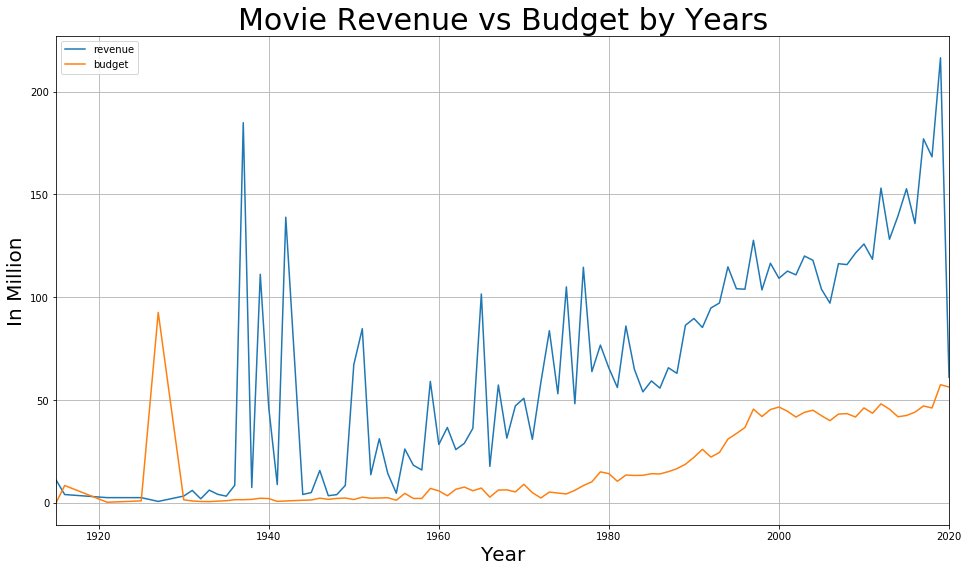

In [395]:
# Ploting the revenue & budget mean over years to see the treding of the movie market
ax =filtered_rb[('revenue', 'budget')].mean().plot(figsize=(16,9), title='Movie Revenue vs Budget by Years', grid=True)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("In Million", fontsize=20)
ax.title.set_size(30)

In [377]:
# Create a groupby object by year
df2_yr = df2.groupby(pd.DatetimeIndex(df2.release_date).year)

In [378]:
# Review the descriptive stastistics
df2_yr[('revenue','budget')].describe()


revenue                                                   \
               count       mean         std   min   25%   50%     75%   
release_date                                                            
1896.0           1.0   0.000000         NaN   0.0   0.0   0.0   0.000   
1900.0           1.0   0.000000         NaN   0.0   0.0   0.0   0.000   
1902.0           1.0   0.000000         NaN   0.0   0.0   0.0   0.000   
1903.0           1.0   0.000000         NaN   0.0   0.0   0.0   0.000   
1915.0           1.0  11.000000         NaN  11.0  11.0  11.0  11.000   
...              ...        ...         ...   ...   ...   ...     ...   
2019.0         606.0  42.512805  191.463913   0.0   0.0   0.0   0.015   
2020.0         414.0   2.032681   17.439669   0.0   0.0   0.0   0.000   
2021.0          13.0   0.000000    0.000000   0.0   0.0   0.0   0.000   
2022.0           1.0   0.000000         NaN   0.0   0.0   0.0   0.000   
2023.0           1.0   0.000000         NaN   0.0   0.0   0.0   0.000   

                      budget                                                 \
                  max  count       mean        std   min   25%   50%    75%   
release_date                                                                  
1896.0           0.00    1.0   0.000000        NaN  0.00  0.00  0.00  0.000   
1900.0           0.00    1.0   0.000000        NaN  0.00  0.00  0.00  0.000   
1902.0           0.00    1.0   0.010000        NaN  0.01  0.01  0.01  0.010   
1903.0           0.00    1.0   0.000000        NaN  0.00  0.00  0.00  0.000   
1915.0          11.00    1.0   0.100000        NaN  0.10  0.10  0.10  0.100   
...               ...    ...        ...        ...   ...   ...   ...    ...   
2019.0        2797.80  606.0  12.610974  36.939850  0.00  0.00  0.00  3.575   
2020.0         265.49  414.0   3.762271  22.543263  0.00  0.00  0.00  0.000   
2021.0           0.00   13.0   0.000000   0.000000  0.00  0.00  0.00  0.000   
2022.0           0.00    1.0   0.000000        NaN  0.00  0.00  0.00  0.000   
2023.0           0.00    1.0   0.000000        NaN  0.00  0.00  0.00  0.000   

                      
                 max  
release_date          
1896.0          0.00  
1900.0          0.00  
1902.0          0.01  
1903.0          0.00  
1915.0          0.10  
...              ...  
2019.0        356.00  
2020.0        250.00  
2021.0          0.00  
2022.0          0.00  
2023.0          0.00  

[111 rows x 16 columns]

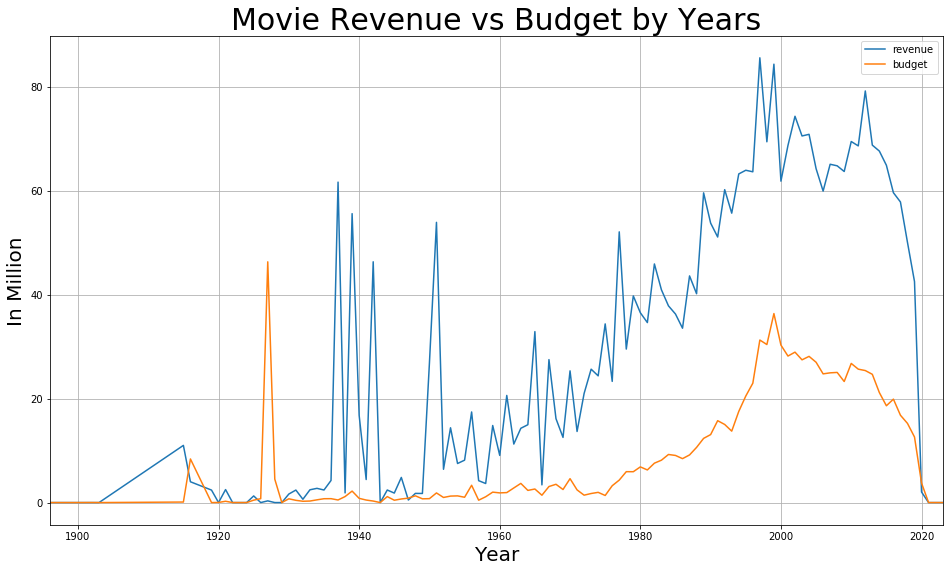

In [379]:
# Ploting the revenue & budget mean over years to see the treding of the movie market
ax = df2_yr[('revenue','budget')].mean().plot(figsize=(16,9), title='Movie Revenue vs Budget by Years', grid=True)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("In Million", fontsize=20)
ax.title.set_size(30)


In [222]:
# Create another dataframe from Movie Mojo
df_mojo = pd.read_csv('movieData.csv')

In [228]:
# Divide value in Gross by 1,000,000
df_mojo.Gross = round(df_mojo.Gross / 1000000, 2)

In [242]:
# Create a groupby obj. by director.  
rev_dtor = df_mojo.groupby('Director')

In [261]:
# Create a plot obj of 25 gross revenue mean by directors
t_25dct = rev_dtor.Gross.mean().sort_values(ascending=False)[0:25]

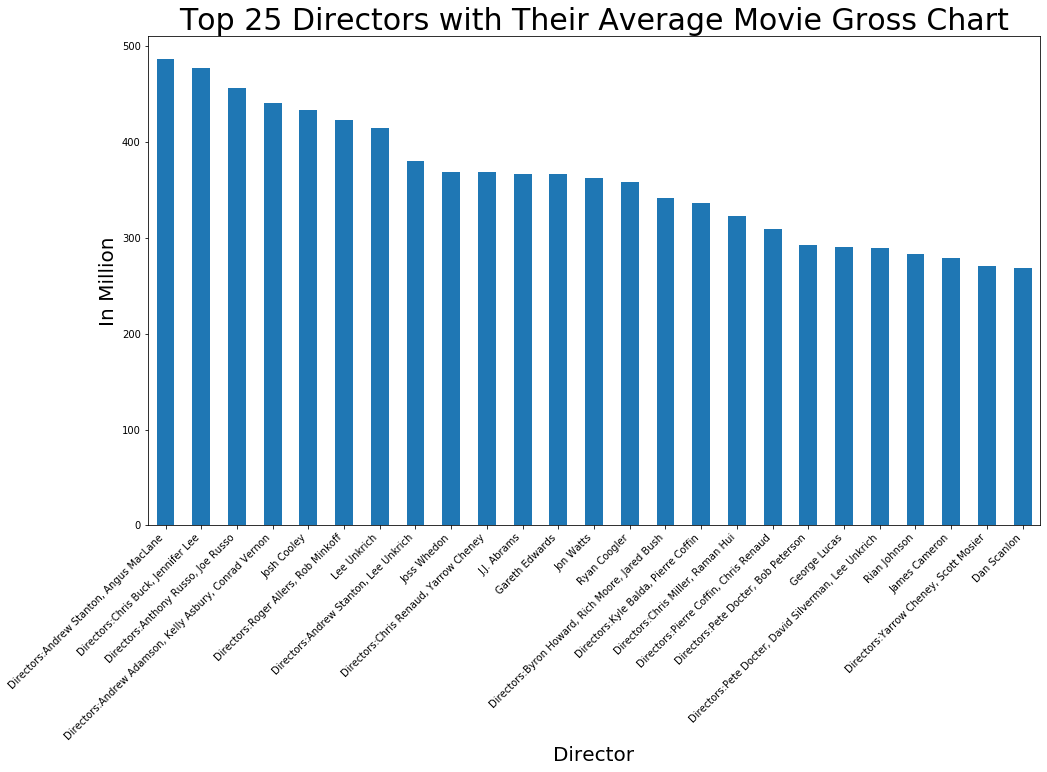

In [316]:
# Plot the graph.
ax = t_25dct.plot(kind='bar',figsize=(16,9), title='Top 25 Directors with Their Average Movie Gross Chart')
ax.set_xlabel("Director", fontsize=20)
ax.set_ylabel("Gross Revenue Mean Value in Million", fontsize=20)
ax.title.set_size(30)
# plt.xticks(rotation=45, ha='right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [236]:
top_50 = df_mojo.sort_values(by='Gross', ascending=False)[0:50]

In [239]:
top_50.Director.value_counts()

George Lucas                                             3
Directors:Anthony Russo, Joe Russo                       3
J.J. Abrams                                              2
Jon Favreau                                              2
Steven Spielberg                                         2
Joss Whedon                                              2
James Cameron                                            2
Sam Raimi                                                2
Christopher Nolan                                        2
Directors:Andrew Adamson, Kelly Asbury, Conrad Vernon    1
Lee Unkrich                                              1
Francis Lawrence                                         1
James Wan                                                1
James Gunn                                               1
Directors:Pierre Coffin, Chris Renaud                    1
Patty Jenkins                                            1
David Yates                                             

In [351]:
# joined_df = df2.join(df3, how='outer')